# SilicoPumpController Setup

**SilicoPumpController** is a digital version of the **PumpController** that you see before you. With this digital version, you can test all of your code before deploying on the actual **PumpController**. 

Start by installing the necessary packages for use of the **SilicoPumpController**. These include the controller itself, the a visualization function and the numpy (NUMerical PYthon) package.

In [5]:
from pump_controller import SilicoPumpController, visualize_rgb
import numpy as np

For comparing two colors $c1$ and $c2$ to get a match score, a function is created. In this case, the `color_difference` function implements a simple sum of root mean squared differences between the two colors. You can try creating your own functions as well.

In [12]:
# Difference between mixed and target colors:
def color_difference(mixed_color, target_color):

    mixed_color = np.array(mixed_color)
    target_color = np.array(target_color)
    # Calculate the sum of root mean squared differences between mixed color and target color
    rmse = np.sqrt(np.mean((mixed_color - target_color)**2, axis=-1))
    return np.sum(rmse)

The silicobot is initialized with a noise value of $3$, meaning that your measurements won't always be the same but contain some noise. Notice that when you instantiate a silicobot, you also generate a file with the current timestamp under the *logs* folder in your current directory. All the colors that you mix will be stored here!

In [6]:
silicobot = SilicoPumpController(noise_std = 3)

In reality, you do not know the components of the target color that you want to match, but can only measure its color. For the Silico case, you must create your own target color. This is done by using the `change_target` function of the silicobot. This function mixes a color with the given mixture amounts and stores that color.

In [7]:
silicobot.change_target([0.1, 0.2, 0.3, 0.4])

Silico target changed to [129.91195602 152.90549346  80.84969868]. Created by [0.1, 0.2, 0.3, 0.4].


array([129.91195602, 152.90549346,  80.84969868])

Both of these properties are stored in the variables `silicobot.target_mixture` and `silicobot.target_color`

In [13]:
print(silicobot.target_mixture)
print(silicobot.target_color)

[0.1, 0.2, 0.3, 0.4]
[129.91195602 152.90549346  80.84969868]


Now to the fun part! You can mix a new color using the `mix_color` function and the color mixture that you decide. The `mix_color` function mixes the color, measures it and logs it as well. You can then use the `color_difference` function we defined earlier to find a match score.

In [8]:
mixture_to_mix = [0.4, 0.3, 0.2, 0.1]
measured_color = silicobot.mix_color(mixture_to_mix)

score = color_difference(measured_color, silicobot.target_color)

print(f"Measured Color: {measured_color}")
print(f"Target Color: {silicobot.target_color}")
print(f"Score: {score}")

Measured Color: [129.01876729 105.05240733  53.69254736]
Target Color: [129.91195602 152.90549346  80.84969868]
Score: 31.771195055870262


We can now compare the color that you mixed with the target color using the `visualize_rgb` function. In this visualization, the outer-most ring shows the color mixture that you used to mix the color. The large ring shows that color that you actually mixed and the inner circle shows the target color. The number in the middle is the score. If you just want your mixed color, simply set the `target` and `score` properties to `None`.

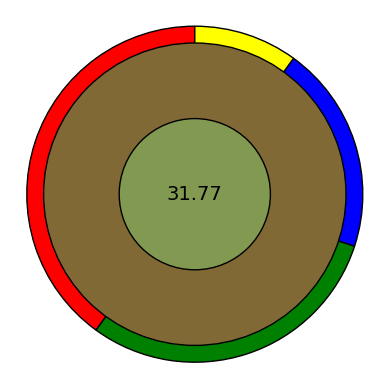

In [20]:
visualize_rgb(mixture = mixture_to_mix,
              rgb = measured_color,
              pump_controller = silicobot,
              target = silicobot.target_color,
              score = score
              )

This concludes the introductinon to **SilicoPumpController**. This is very similar to the **PumpController** so that your code is easily deployable. 

# PumpController Setup

Now we can start mixing some colors in the real world. Similar to before, we import the necessary functions. This time we have two extra functions helping us to connect to the **PumpController**

In [1]:
from pump_controller import PumpController, get_serial_port, list_serial_ports
from pump_controller import visualize_rgb
import numpy as np

We again define the `color_difference` function to find the match score between two colors

In [2]:
# Difference between mixed and target colors:
def color_difference(mixed_color, target_color):

    mixed_color = np.array(mixed_color)
    target_color = np.array(target_color)
    # Calculate the sum of root mean squared differences between mixed color and target color
    rmse = np.sqrt(np.mean((mixed_color - target_color)**2, axis=-1))
    return np.sum(rmse)

Now we initialize the pumpbot. We need to figure out which port that the controller is connected to your computer. The `get_serial_port` should automatically do this for you, but things have a way of failing when you need them not to. That is why you can call the `list_serial_ports` function to see all the ports on your computer, and you can simply use the correct port as a string input instead of using the `get_serial_port` function. The `cell_volume` and `drain_time` properties are already defined to 15 mL and 15 seconds, respectively, but you have the option of changing them here. Notice that a folder called *logs* is created with a file with the current timestamp in it - this is where the colors that you mix on this controller in this session will be stored.


You might want to change the `config_file` to your config file

In [65]:
pumpbot = PumpController(ser_port = get_serial_port(), cell_volume = 15, drain_time = 15, config_file = 'config_files/config_template.json')

# list_serial_ports()
# pumpbot = PumpController(ser_port = '/dev/ttyUSB0', cell_volume = 15, drain_time = 15)

Serial port /dev/cu.usbserial-210 opened at baud rate 9600
Arduino is ready


Before mixing any colors, we should purge all the pumps. This means filling all of the tubes with their respective liquids. We do this by using the `purge_pump` function, which takes the pump name ('R', 'G', 'B', 'Y', 'W', 'D') and time as variables. Do this one-by-one until all tubes are filled with liquid. The drain tubes of course do not need to be purged. You can then drain the test cell using the `drain` function which by itself drains the whole cell for the defined drain time in the previous cell, but you can also define a custom drain time here. If needed you can also flush the cell with water using the `flush` function and then drain again.

In [79]:
pumpbot.purge_pump('R', 1)

# pumpbot.purge_pump('G', 5)
# pumpbot.purge_pump('B', 5)
# pumpbot.purge_pump('Y', 5)
# pumpbot.purge_pump('W', 5)

# Drain:
# pumpbot.drain()

# Drain for custom time:
# pumpbot.drain(drain_time = 10)

# Flush:
# pumpbot.flush()

Sent from PC -- TEST STR -- <Mix,2,1>
Reply Received  Msg Mix,2,1 Time 417


At this point, your teacher would give you a color that you have to match, where you do not know anything about the mixture. You can pour this color into the test cell and use the `measure` function to measure this color and store this in the `target_color` property of the pumpbot. 


If at any point you feel like making your own target color and trying to match it, you can do it in the same way as with the **SilicoPumpController** and the `change_target` function

In [ ]:
pumpbot.target_color = pumpbot.measure()
print(pumpbot.target_color)

# Make your own target color:
# pumpbot.change_target([0.1, 0.2, 0.3, 0.4])
# print(pumpbot.target_mixture)
# print(pumpbot.target_color)

After the target color is measured, you should empty the test cell. This can be done using the `reset` function. This function drains the cell, flushes it with water and then drains the cell again. This is equivalent to calling the `drain`, `flush` and `drain` functions.

In [ ]:
pumpbot.reset()

# Equivalent to:
# pumpbot.drain()
# pumpbot.flush()
# pumpbot.drain()


Now you can mix a color with a mixture that you decide, and calculate the match score with the target color

In [ ]:
mixture_to_mix = [0.4, 0.3, 0.2, 0.1]
measured_color = pumpbot.mix_color(mixture_to_mix)

score = color_difference(measured_color, pumpbot.target_color)

print(f"Measured Color: {measured_color}")
print(f"Target Color: {pumpbot.target_color}")
print(f"Score: {score}")

Again, you can visualize this newly mixed color

In [ ]:
visualize_rgb(mixture = mixture_to_mix,
              rgb = measured_color,
              pump_controller = pumpbot,
              target = pumpbot.target_color,
              score = score)

This concludes the **PumpController** introduction. Now you can start mixing your own colors and trying to match the colors manually. You might find that this isn't the most optimal way - an algorithm to decide these colors might be a better way!